Dataset source: https://www.kaggle.com/datasets/everydaycodings/global-news-dataset?select=data.csv

>[Notebook 2: Text Analysis of Global News Dataset](#scrollTo=kVnPWN3HJrsv)

>>[Part 1: Load Dataset](#scrollTo=rncpuLXcKDBE)

>>[Part 2: Data Cleaning and Derived Attributes](#scrollTo=GwX0dvKO3P06)

>>[Part 3: Data Visualization](#scrollTo=mhe0iNm0Si2K)

>>[Part 4: Tokenization, Stemming and Lemmatization](#scrollTo=0bNUOAdoMFwq)

>>[Part 5: Bag of Words Model and TF-IDF](#scrollTo=e5pt4Tvycgal)

>>[Part 6: Unigrams and Bigrams](#scrollTo=kBpuUZJD_cMi)

>>[Part 7: Sentiment Analysis](#scrollTo=-FtSI4gwFzIn)

>>[Part 8: POS Tagging](#scrollTo=myZashi_-Zht)

>>[Part 9: Named Entity Recognition](#scrollTo=vw1cbyXRb6Em)

>>[Part 10: Determining Possible Predictive Influence on Stock Market Using Machine Learning](#scrollTo=sCKX8ASytibX)

>>[Part 11: Statistical Analysis Approach](#scrollTo=PIMJFdG-faC6)



# Notebook 2: Text Analysis of Global News Dataset

In this notebook we will conduct text analysis of the global news dataset.


## Part 1: Load Dataset



Load Dataset

In [1]:
cd /content/drive/MyDrive/CIND820

/content/drive/MyDrive/CIND820


In [2]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('wordnet')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Set option to display full column
# pd.set_option('display.max_colwidth', None)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# load dataset
news_df = pd.read_csv('generated_dfs/filtered_data.csv')

Converted all datatypes in raw_data.csv to 'object' to standardize datatypes in each column

In [4]:
news_df.shape

(33029, 15)

In [5]:
news_df.head()

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,full_content,article,title_sentiment,all_text
0,94333,business-insider,Business Insider,Sponsor Post,Unlocking the future of the web,"From Chipotle to Roblox, web3 is enabling busi...",https://www.businessinsider.com/sc/web3-helps-...,https://i.insider.com/654374023cc84b4dfafa98cb...,2023-11-02 16:25:49,Adobe Stock\nHarnessing customer engagement an...,Stock,NaN,NaN,NaN,Unlocking the future of the web From Chipotle ...
1,94368,NaN,The Indian Express,Reuters,"LinkedIn hits 1 billion members, adds AI featu...",LinkedIn also introduced on Wednesday a button...,https://indianexpress.com/article/technology/s...,https://images.indianexpress.com/2023/11/Linke...,2023-11-02 03:48:44,"LinkedIn, the business-focused social network ...",Stock,"LinkedIn, the business-focused social network ...",NaN,NaN,"LinkedIn hits 1 billion members, adds AI featu..."
2,94370,NaN,Investor's Business Daily,Investor's Business Daily,"Moderna Beats Sales Forecasts, But Light Guida...",The company issued below-consensus sales views...,https://www.investors.com/news/technology/mode...,https://www.investors.com/wp-content/uploads/2...,2023-11-02 10:30:25,Moderna (MRNA) stock could take a hit Thursday...,Stock,NaN,NaN,NaN,"Moderna Beats Sales Forecasts, But Light Guida..."
3,94331,abc-news,ABC News,ABC News,WATCH: Man rescued from crashed plane in the E...,A man was hoisted to safety after a small plan...,https://abcnews.go.com/US/video/man-rescued-cr...,https://i.abcnewsfe.com/a/dee71d57-ad91-4eec-8...,2023-11-02 10:19:28,<ul><li>Whats next for Russia? \n</li><li>What...,Stock,NaN,NaN,NaN,WATCH: Man rescued from crashed plane in the E...
4,94332,abc-news,ABC News,ABC News,WATCH: Teen solves Rubik’s cube while skydiving,"Sam Sieracki, 17, broke the world record by so...",https://abcnews.go.com/GMA/Living/video/teen-s...,https://i.abcnewsfe.com/a/a4f53cb3-cbfe-4f01-a...,2023-11-02 12:16:02,<ul><li>Whats next for Russia? \n</li><li>What...,Stock,NaN,NaN,NaN,WATCH: Teen solves Rubik’s cube while skydivin...


In [6]:
news_df.describe()

,article_id
count,33029.000000
mean,369172.855370
std,214764.099888
min,19925.000000
25%,176448.000000
50%,335829.000000
75%,565143.000000
max,790369.000000


In [7]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33029 entries, 0 to 33028
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   article_id       33029 non-null  int64 
 1   source_id        6012 non-null   object
 2   source_name      33029 non-null  object
 3   author           30355 non-null  object
 4   title            33027 non-null  object
 5   description      32407 non-null  object
 6   url              33029 non-null  object
 7   url_to_image     32031 non-null  object
 8   published_at     33029 non-null  object
 9   content          33018 non-null  object
 10  category         33029 non-null  object
 11  full_content     5490 non-null   object
 12  article          5537 non-null   object
 13  title_sentiment  5537 non-null   object
 14  all_text         33029 non-null  object
dtypes: int64(1), object(14)
memory usage: 3.8+ MB


## Part 2: Data Cleaning and Derived Attributes

Issues with dataset:

Before we start text analysis there are some problems and questions we need to answer.



*   There is non-english text in the dataset



Solution:

* Since this is a global news dataset if we want to make the most of the data we should translate non-english text to English. However there are limitations such as limits to the number of calls made to free translators so we will skip doing translations.


In [8]:
# remove all special characters in text
import re

def remove_special_characters(text):
    # Define the pattern to match special characters
    # Keep only alphanumeric characters, select punctuation and whitespace
    pattern = r'[^a-zA-Z0-9\s.,!?$]'

    # Use the sub() function to replace matched patterns with an empty string
    cleaned_text = re.sub(pattern, '', text)

    return cleaned_text

news_df['cleaned_text'] = news_df['all_text'].apply(remove_special_characters)

In [9]:
news_df.head()

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,full_content,article,title_sentiment,all_text,cleaned_text
0,94333,business-insider,Business Insider,Sponsor Post,Unlocking the future of the web,"From Chipotle to Roblox, web3 is enabling busi...",https://www.businessinsider.com/sc/web3-helps-...,https://i.insider.com/654374023cc84b4dfafa98cb...,2023-11-02 16:25:49,Adobe Stock\nHarnessing customer engagement an...,Stock,NaN,NaN,NaN,Unlocking the future of the web From Chipotle ...,Unlocking the future of the web From Chipotle ...
1,94368,NaN,The Indian Express,Reuters,"LinkedIn hits 1 billion members, adds AI featu...",LinkedIn also introduced on Wednesday a button...,https://indianexpress.com/article/technology/s...,https://images.indianexpress.com/2023/11/Linke...,2023-11-02 03:48:44,"LinkedIn, the business-focused social network ...",Stock,"LinkedIn, the business-focused social network ...",NaN,NaN,"LinkedIn hits 1 billion members, adds AI featu...","LinkedIn hits 1 billion members, adds AI featu..."
2,94370,NaN,Investor's Business Daily,Investor's Business Daily,"Moderna Beats Sales Forecasts, But Light Guida...",The company issued below-consensus sales views...,https://www.investors.com/news/technology/mode...,https://www.investors.com/wp-content/uploads/2...,2023-11-02 10:30:25,Moderna (MRNA) stock could take a hit Thursday...,Stock,NaN,NaN,NaN,"Moderna Beats Sales Forecasts, But Light Guida...","Moderna Beats Sales Forecasts, But Light Guida..."
3,94331,abc-news,ABC News,ABC News,WATCH: Man rescued from crashed plane in the E...,A man was hoisted to safety after a small plan...,https://abcnews.go.com/US/video/man-rescued-cr...,https://i.abcnewsfe.com/a/dee71d57-ad91-4eec-8...,2023-11-02 10:19:28,<ul><li>Whats next for Russia? \n</li><li>What...,Stock,NaN,NaN,NaN,WATCH: Man rescued from crashed plane in the E...,WATCH Man rescued from crashed plane in the Ev...
4,94332,abc-news,ABC News,ABC News,WATCH: Teen solves Rubik’s cube while skydiving,"Sam Sieracki, 17, broke the world record by so...",https://abcnews.go.com/GMA/Living/video/teen-s...,https://i.abcnewsfe.com/a/a4f53cb3-cbfe-4f01-a...,2023-11-02 12:16:02,<ul><li>Whats next for Russia? \n</li><li>What...,Stock,NaN,NaN,NaN,WATCH: Teen solves Rubik’s cube while skydivin...,WATCH Teen solves Rubiks cube while skydiving ...


In [10]:
# Define a regular expression pattern to match tickers
ticker_pattern = r'\b[A-Z]{2,6}\b'

# Function to extract unique tickers from text
def extract_tickers(text):
    return re.findall(ticker_pattern, text)

# Apply the extract_tickers function to the cleaned text column
news_df['tickers'] = news_df['cleaned_text'].apply(extract_tickers)

In [11]:
# remove duplicate tickers
news_df['tickers'] = news_df['tickers'].apply(set)

In [12]:
news_df.head()

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,full_content,article,title_sentiment,all_text,cleaned_text,tickers
0,94333,business-insider,Business Insider,Sponsor Post,Unlocking the future of the web,"From Chipotle to Roblox, web3 is enabling busi...",https://www.businessinsider.com/sc/web3-helps-...,https://i.insider.com/654374023cc84b4dfafa98cb...,2023-11-02 16:25:49,Adobe Stock\nHarnessing customer engagement an...,Stock,NaN,NaN,NaN,Unlocking the future of the web From Chipotle ...,Unlocking the future of the web From Chipotle ...,{}
1,94368,NaN,The Indian Express,Reuters,"LinkedIn hits 1 billion members, adds AI featu...",LinkedIn also introduced on Wednesday a button...,https://indianexpress.com/article/technology/s...,https://images.indianexpress.com/2023/11/Linke...,2023-11-02 03:48:44,"LinkedIn, the business-focused social network ...",Stock,"LinkedIn, the business-focused social network ...",NaN,NaN,"LinkedIn hits 1 billion members, adds AI featu...","LinkedIn hits 1 billion members, adds AI featu...",{AI}
2,94370,NaN,Investor's Business Daily,Investor's Business Daily,"Moderna Beats Sales Forecasts, But Light Guida...",The company issued below-consensus sales views...,https://www.investors.com/news/technology/mode...,https://www.investors.com/wp-content/uploads/2...,2023-11-02 10:30:25,Moderna (MRNA) stock could take a hit Thursday...,Stock,NaN,NaN,NaN,"Moderna Beats Sales Forecasts, But Light Guida...","Moderna Beats Sales Forecasts, But Light Guida...",{MRNA}
3,94331,abc-news,ABC News,ABC News,WATCH: Man rescued from crashed plane in the E...,A man was hoisted to safety after a small plan...,https://abcnews.go.com/US/video/man-rescued-cr...,https://i.abcnewsfe.com/a/dee71d57-ad91-4eec-8...,2023-11-02 10:19:28,<ul><li>Whats next for Russia? \n</li><li>What...,Stock,NaN,NaN,NaN,WATCH: Man rescued from crashed plane in the E...,WATCH Man rescued from crashed plane in the Ev...,{WATCH}
4,94332,abc-news,ABC News,ABC News,WATCH: Teen solves Rubik’s cube while skydiving,"Sam Sieracki, 17, broke the world record by so...",https://abcnews.go.com/GMA/Living/video/teen-s...,https://i.abcnewsfe.com/a/a4f53cb3-cbfe-4f01-a...,2023-11-02 12:16:02,<ul><li>Whats next for Russia? \n</li><li>What...,Stock,NaN,NaN,NaN,WATCH: Teen solves Rubik’s cube while skydivin...,WATCH Teen solves Rubiks cube while skydiving ...,{WATCH}


## Part 3: Data Visualization

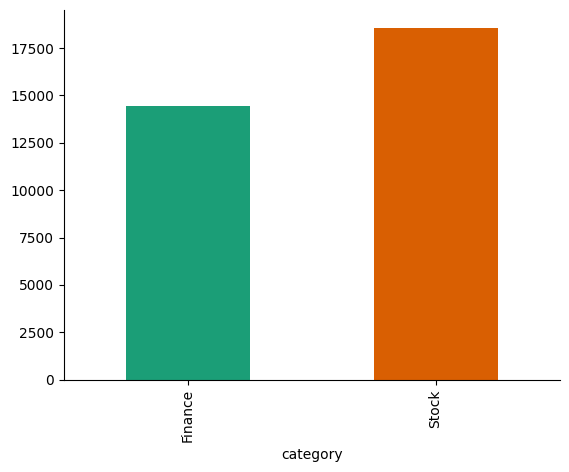

In [13]:
# visualize data distribution of category
import seaborn as sns

news_df.groupby('category').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

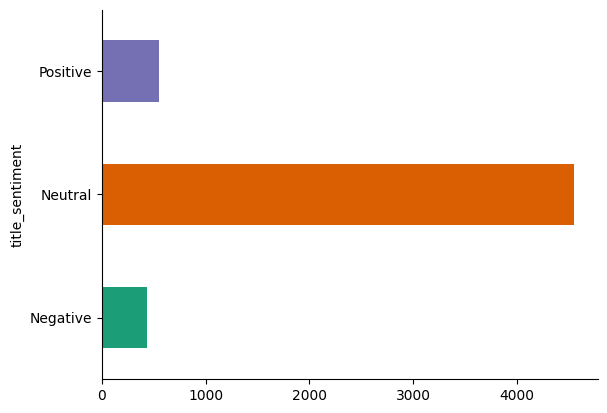

In [14]:
# Visualize title_sentiment
import seaborn as sns

news_df.groupby('title_sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

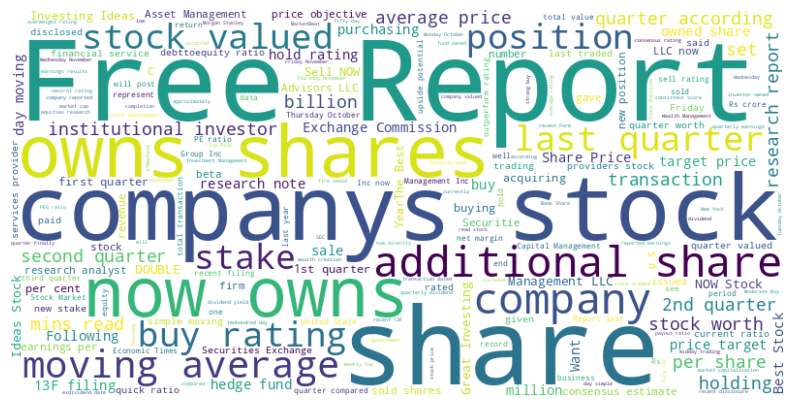

In [15]:
# Visualize text in wordcloud
from wordcloud import WordCloud

# Concatenate all text from the column into a single string
all_text = ' '.join(news_df['cleaned_text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Part 4: Tokenization, Stemming and Lemmatization

In [16]:
from nltk.tokenize import word_tokenize
import spacy
from nltk.chunk import ne_chunk

# Load the English language model
nlp = spacy.load("en_core_web_sm")

In [17]:
# Convert 'cleaned_text' column to string type
news_df['cleaned_text'] = news_df['cleaned_text'].astype(str)

In [18]:
news_df['tokens'] = news_df['cleaned_text'].apply(word_tokenize)

In [19]:
# get number of tokens
news_df['num_tokens'] = news_df['tokens'].apply(len)

In [20]:
# remove stop words from tokens
from nltk.corpus import stopwords
nltk.download('stopwords')

# Define a list of stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stop words from tokens
def remove_stopwords(tokens):
    return [token for token in tokens if token.lower() not in stop_words]

# Apply the remove_stopwords function to the DataFrame
news_df['tokens_without_stopwords'] = news_df['tokens'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
news_df.head()

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,full_content,article,title_sentiment,all_text,cleaned_text,tickers,tokens,num_tokens,tokens_without_stopwords
0,94333,business-insider,Business Insider,Sponsor Post,Unlocking the future of the web,"From Chipotle to Roblox, web3 is enabling busi...",https://www.businessinsider.com/sc/web3-helps-...,https://i.insider.com/654374023cc84b4dfafa98cb...,2023-11-02 16:25:49,Adobe Stock\nHarnessing customer engagement an...,Stock,NaN,NaN,NaN,Unlocking the future of the web From Chipotle ...,Unlocking the future of the web From Chipotle ...,{},"[Unlocking, the, future, of, the, web, From, C...",56,"[Unlocking, future, web, Chipotle, Roblox, ,, ..."
1,94368,NaN,The Indian Express,Reuters,"LinkedIn hits 1 billion members, adds AI featu...",LinkedIn also introduced on Wednesday a button...,https://indianexpress.com/article/technology/s...,https://images.indianexpress.com/2023/11/Linke...,2023-11-02 03:48:44,"LinkedIn, the business-focused social network ...",Stock,"LinkedIn, the business-focused social network ...",NaN,NaN,"LinkedIn hits 1 billion members, adds AI featu...","LinkedIn hits 1 billion members, adds AI featu...",{AI},"[LinkedIn, hits, 1, billion, members, ,, adds,...",316,"[LinkedIn, hits, 1, billion, members, ,, adds,..."
2,94370,NaN,Investor's Business Daily,Investor's Business Daily,"Moderna Beats Sales Forecasts, But Light Guida...",The company issued below-consensus sales views...,https://www.investors.com/news/technology/mode...,https://www.investors.com/wp-content/uploads/2...,2023-11-02 10:30:25,Moderna (MRNA) stock could take a hit Thursday...,Stock,NaN,NaN,NaN,"Moderna Beats Sales Forecasts, But Light Guida...","Moderna Beats Sales Forecasts, But Light Guida...",{MRNA},"[Moderna, Beats, Sales, Forecasts, ,, But, Lig...",54,"[Moderna, Beats, Sales, Forecasts, ,, Light, G..."
3,94331,abc-news,ABC News,ABC News,WATCH: Man rescued from crashed plane in the E...,A man was hoisted to safety after a small plan...,https://abcnews.go.com/US/video/man-rescued-cr...,https://i.abcnewsfe.com/a/dee71d57-ad91-4eec-8...,2023-11-02 10:19:28,<ul><li>Whats next for Russia? \n</li><li>What...,Stock,NaN,NaN,NaN,WATCH: Man rescued from crashed plane in the E...,WATCH Man rescued from crashed plane in the Ev...,{WATCH},"[WATCH, Man, rescued, from, crashed, plane, in...",56,"[WATCH, Man, rescued, crashed, plane, Everglad..."
4,94332,abc-news,ABC News,ABC News,WATCH: Teen solves Rubik’s cube while skydiving,"Sam Sieracki, 17, broke the world record by so...",https://abcnews.go.com/GMA/Living/video/teen-s...,https://i.abcnewsfe.com/a/a4f53cb3-cbfe-4f01-a...,2023-11-02 12:16:02,<ul><li>Whats next for Russia? \n</li><li>What...,Stock,NaN,NaN,NaN,WATCH: Teen solves Rubik’s cube while skydivin...,WATCH Teen solves Rubiks cube while skydiving ...,{WATCH},"[WATCH, Teen, solves, Rubiks, cube, while, sky...",55,"[WATCH, Teen, solves, Rubiks, cube, skydiving,..."


In [22]:
# import stemming and lemmatization algorithms
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [23]:
# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Function to apply stemming
def apply_stemming(tokens):
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

# Function to apply lemmatization
def apply_lemmatization(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Apply stemming and lemmatization to tokens column
news_df['stemmed_tokens'] = news_df['tokens'].apply(apply_stemming)
news_df['lemmatized_tokens'] = news_df['tokens'].apply(apply_lemmatization)

In [24]:
news_df.to_csv('generated_dfs/news_df_v1.csv', index=False)

## Part 5: Bag of Words Model and TF-IDF


Below is the function for TF-IDF(Term Frequency-Inverse Document Frequency):

$$\text{TF-IDF}(t, d, C) = \text{TF}(t, d) \times \text{IDF}(t, C)$$

$$\text{TF}(t, d) = \frac{\text{number of times term } t \text{ appears in document } d}{\text{total number of terms in document } d}$$

$$\text{IDF}(t, C) = \log\left(\frac{\text{total number of documents in corpus } C}{\text{number of documents containing term } t}\right)$$

In [25]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [26]:
# Bag of Words (BoW) model
def get_vocab_bow(text):
    # instantiate vectorizer
    vectorizer = CountVectorizer()
    # Fit and transform the text using CountVectorizer
    X = vectorizer.fit_transform([text])
    # Get the vocabulary generated by CountVectorizer
    vocab = vectorizer.vocabulary_
    # Return the feature names
    return vocab

In [27]:
# apply vectorizer to cleaned text
news_df['bow_vocab'] = news_df['cleaned_text'].apply(get_vocab_bow)

In [28]:
# TF-IDF
# Initialize the TfidfVectorizer object
tfidf_vectorizer = TfidfVectorizer(max_df=0.5, max_features=10000, use_idf=True,
                                   stop_words='english')

# Fit and transform the text column to generate the TF-IDF representation
tfidf_matrix = tfidf_vectorizer.fit_transform(news_df['cleaned_text'])

In [29]:
# Convert TF-IDF matrix to DataFrame for visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(),
                        columns=tfidf_vectorizer.get_feature_names_out())

In [30]:
# checkpoint to save dataframe
# Save the DataFrame to a CSV file
tfidf_df.to_csv('generated_dfs/tfidf_df.csv', index=False)

## Part 6: Unigrams and Bigrams

In [31]:
from nltk.util import ngrams

In [32]:
# Get unigrams and bigrams
news_df['unigrams'] = news_df['tokens'].apply(lambda x: list(ngrams(x, 1)))
news_df['bigrams'] = news_df['tokens'].apply(lambda x: list(ngrams(x, 2)))

In [33]:
news_df.to_csv('generated_dfs/news_df_v2.csv', index=False)

In [34]:
news_df.head()

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,full_content,article,title_sentiment,all_text,cleaned_text,tickers,tokens,num_tokens,tokens_without_stopwords,stemmed_tokens,lemmatized_tokens,bow_vocab,unigrams,bigrams
0,94333,business-insider,Business Insider,Sponsor Post,Unlocking the future of the web,"From Chipotle to Roblox, web3 is enabling busi...",https://www.businessinsider.com/sc/web3-helps-...,https://i.insider.com/654374023cc84b4dfafa98cb...,2023-11-02 16:25:49,Adobe Stock\nHarnessing customer engagement an...,Stock,NaN,NaN,NaN,Unlocking the future of the web From Chipotle ...,Unlocking the future of the web From Chipotle ...,{},"[Unlocking, the, future, of, the, web, From, C...",56,"[Unlocking, future, web, Chipotle, Roblox, ,, ...","[unlock, the, futur, of, the, web, from, chipo...","[Unlocking, the, future, of, the, web, From, C...","{'unlocking': 39, 'the': 37, 'future': 19, 'of...","[(Unlocking,), (the,), (future,), (of,), (the,...","[(Unlocking, the), (the, future), (future, of)..."
1,94368,NaN,The Indian Express,Reuters,"LinkedIn hits 1 billion members, adds AI featu...",LinkedIn also introduced on Wednesday a button...,https://indianexpress.com/article/technology/s...,https://images.indianexpress.com/2023/11/Linke...,2023-11-02 03:48:44,"LinkedIn, the business-focused social network ...",Stock,"LinkedIn, the business-focused social network ...",NaN,NaN,"LinkedIn hits 1 billion members, adds AI featu...","LinkedIn hits 1 billion members, adds AI featu...",{AI},"[LinkedIn, hits, 1, billion, members, ,, adds,...",316,"[LinkedIn, hits, 1, billion, members, ,, adds,...","[linkedin, hit, 1, billion, member, ,, add, ai...","[LinkedIn, hit, 1, billion, member, ,, add, AI...","{'linkedin': 72, 'hits': 56, 'billion': 19, 'm...","[(LinkedIn,), (hits,), (1,), (billion,), (memb...","[(LinkedIn, hits), (hits, 1), (1, billion), (b..."
2,94370,NaN,Investor's Business Daily,Investor's Business Daily,"Moderna Beats Sales Forecasts, But Light Guida...",The company issued below-consensus sales views...,https://www.investors.com/news/technology/mode...,https://www.investors.com/wp-content/uploads/2...,2023-11-02 10:30:25,Moderna (MRNA) stock could take a hit Thursday...,Stock,NaN,NaN,NaN,"Moderna Beats Sales Forecasts, But Light Guida...","Moderna Beats Sales Forecasts, But Light Guida...",{MRNA},"[Moderna, Beats, Sales, Forecasts, ,, But, Lig...",54,"[Moderna, Beats, Sales, Forecasts, ,, Light, G...","[moderna, beat, sale, forecast, ,, but, light,...","[Moderna, Beats, Sales, Forecasts, ,, But, Lig...","{'moderna': 23, 'beats': 6, 'sales': 27, 'fore...","[(Moderna,), (Beats,), (Sales,), (Forecasts,),...","[(Moderna, Beats), (Beats, Sales), (Sales, For..."
3,94331,abc-news,ABC News,ABC News,WATCH: Man rescued from crashed plane in the E...,A man was hoisted to safety after a small plan...,https://abcnews.go.com/US/video/man-rescued-cr...,https://i.abcnewsfe.com/a/dee71d57-ad91-4eec-8...,2023-11-02 10:19:28,<ul><li>Whats next for Russia? \n</li><li>What...,Stock,NaN,NaN,NaN,WATCH: Man rescued from crashed plane in the E...,WATCH Man rescued from crashed plane in the Ev...,{WATCH},"[WATCH, Man, rescued, from, crashed, plane, in...",56,"[WATCH, Man, rescued, crashed, plane, Everglad...","[watch, man, rescu, from, crash, plane, in, th...","[WATCH, Man, rescued, from, crashed, plane, in...","{'watch': 36, 'man': 19, 'rescued': 23, 'from'...","[(WATCH,), (Man,), (rescued,), (from,), (crash...","[(WATCH, Man), (Man, rescued), (rescued, from)..."
4,94332,abc-news,ABC News,ABC News,WATCH: Teen solves Rubik’s cube while skydiving,"Sam Sieracki, 17, broke the world record by so...",https://abcnews.go.com/GMA/Living/video/teen-s...,https://i.abcnewsfe.com/a/a4f53cb3-cbfe-4f01-a...,2023-11-02 12:16:02,<ul><li>Whats next for Russia? \n</li><li>What...,Stock,NaN,NaN,NaN,WATCH: Teen solves Rubik’s cube while skydivin...,WATCH Teen solves Rubiks cube while skydiving ...,{WATCH},"[WATCH, T

## Part 7: Sentiment Analysis

**Sentiment Analysis** aims to determine the sentiment or opinion expressed in a piece of text. Semantic approaches to sentiment analysis involve understanding the semantics of words and phrases, as well as their contextual relationships, to infer sentiment.


In [35]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [36]:
# Create a SentimentIntensityAnalyzer object
sid = SentimentIntensityAnalyzer()

In [37]:
news_df['vader_sentiment'] = news_df['cleaned_text'].apply(sid.polarity_scores)

In [38]:
def split_sentiment(sentiment_dict):
    return pd.Series(sentiment_dict)

In [39]:
# Apply the function to split the sentiment dictionary into separate columns
sentiment_scores = news_df['vader_sentiment'].apply(split_sentiment)

# Concatenate the sentiment scores DataFrame with the original DataFrame
news_df = pd.concat([news_df, sentiment_scores], axis=1)

In [40]:
# checkpoint 3 to store dataframe
news_df.to_csv('generated_dfs/news_df_v3.csv', index=False)

## Part 8: POS Tagging

In [41]:
# Apply POS tagging
news_df['pos_tags'] = news_df['tokens_without_stopwords'].apply(nltk.pos_tag)

In [42]:
# checkpoint 4 to store dataframe
news_df.to_csv('generated_dfs/news_df_v4.csv', index=False)

## Part 9: Named Entity Recognition

In [43]:
# Apply NER
news_df['NER'] = news_df['pos_tags'].apply(nltk.ne_chunk)

In [44]:
news_df.head()

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,full_content,article,title_sentiment,all_text,cleaned_text,tickers,tokens,num_tokens,tokens_without_stopwords,stemmed_tokens,lemmatized_tokens,bow_vocab,unigrams,bigrams,vader_sentiment,neg,neu,pos,compound,pos_tags,NER
0,94333,business-insider,Business Insider,Sponsor Post,Unlocking the future of the web,"From Chipotle to Roblox, web3 is enabling busi...",https://www.businessinsider.com/sc/web3-helps-...,https://i.insider.com/654374023cc84b4dfafa98cb...,2023-11-02 16:25:49,Adobe Stock\nHarnessing customer engagement an...,Stock,NaN,NaN,NaN,Unlocking the future of the web From Chipotle ...,Unlocking the future of the web From Chipotle ...,{},"[Unlocking, the, future, of, the, web, From, C...",56,"[Unlocking, future, web, Chipotle, Roblox, ,, ...","[unlock, the, futur, of, the, web, from, chipo...","[Unlocking, the, future, of, the, web, From, C...","{'unlocking': 39, 'the': 37, 'future': 19, 'of...","[(Unlocking,), (the,), (future,), (of,), (the,...","[(Unlocking, the), (the, future), (future, of)...","{'neg': 0.026, 'neu': 0.816, 'pos': 0.158, 'co...",0.026,0.816,0.158,0.8225,"[(Unlocking, VBG), (future, JJ), (web, JJ), (C...","[(Unlocking, VBG), (future, JJ), (web, JJ), [(..."
1,94368,NaN,The Indian Express,Reuters,"LinkedIn hits 1 billion members, adds AI featu...",LinkedIn also introduced on Wednesday a button...,https://indianexpress.com/article/technology/s...,https://images.indianexpress.com/2023/11/Linke...,2023-11-02 03:48:44,"LinkedIn, the business-focused social network ...",Stock,"LinkedIn, the business-focused social network ...",NaN,NaN,"LinkedIn hits 1 billion members, adds AI featu...","LinkedIn hits 1 billion members, adds AI featu...",{AI},"[LinkedIn, hits, 1, billion, members, ,, adds,...",316,"[LinkedIn, hits, 1, billion, members, ,, adds,...","[linkedin, hit, 1, billion, member, ,, add, ai...","[LinkedIn, hit, 1, billion, member, ,, add, AI...","{'linkedin': 72, 'hits': 56, 'billion': 19, 'm...","[(LinkedIn,), (hits,), (1,), (billion,), (memb...","[(LinkedIn, hits), (hits, 1), (1, billion), (b...","{'neg': 0.012, 'neu': 0.886, 'pos': 0.101, 'co...",0.012,0.886,0.101,0.9733,"[(LinkedIn, NNP), (hits, VBZ), (1, CD), (billi...","[[(LinkedIn, NNP)], (hits, VBZ), (1, CD), (bil..."
2,94370,NaN,Investor's Business Daily,Investor's Business Daily,"Moderna Beats Sales Forecasts, But Light Guida...",The company issued below-consensus sales views...,https://www.investors.com/news/technology/mode...,https://www.investors.com/wp-content/uploads/2...,2023-11-02 10:30:25,Moderna (MRNA) stock could take a hit Thursday...,Stock,NaN,NaN,NaN,"Moderna Beats Sales Forecasts, But Light Guida...","Moderna Beats Sales Forecasts, But Light Guida...",{MRNA},"[Moderna, Beats, Sales, Forecasts, ,, But, Lig...",54,"[Moderna, Beats, Sales, Forecasts, ,, Light, G...","[moderna, beat, sale, forecast, ,, but, light,...","[Moderna, Beats, Sales, Forecasts, ,, But, Lig...","{'moderna': 23, 'beats': 6, 'sales': 27, 'fore...","[(Moderna,), (Beats,), (Sales,), (Forecasts,),...","[(Moderna, Beats), (Beats, Sales), (Sales, For...","{'neg': 0.065, 'neu': 0.883, 'pos': 0.052, 'co...",0.065,0.883,0.052,-0.1901,"[(Moderna, NNP), (Beats, NNP), (Sales, NNS), (...","[[(Moderna, NNP)], (Beats, NNP), (Sales, NNS),..."
3,94331,abc-news,ABC News,ABC News,WATCH: Man rescued from crashed plane in the E...,A man was hoisted to safety after a small plan...,https://abcnews.go.com/US/video/man-rescued-cr...,https://i.abcnewsfe.com/a/dee71d57-ad91-4eec-8...,2023-11-02 10:19:28,<ul><li>Whats next for Russia? \n</li><li>What...,Stock,NaN,NaN,NaN,WATCH: Man rescued from crashed plane in the E...,WATCH Man rescued from crashed plane in the Ev...,{WATCH},"[WATCH, Man, rescued, from, crashed, plane, in...",56,"[WATCH, Man, rescued, crashed, plane, Everglad...","[watch, man, rescu, from, crash, plane, in, th...","[WATCH, Man, rescued, from, crashed, plane, in...","{'

In [45]:
# checkpoint 5 to store dataframe
news_df.to_csv('generated_dfs/news_df_v5.csv', index=False)

## Part 10: Determining Possible Predictive Influence on Stock Market Using Machine Learning

Three major US stock market indices are:

1.   S&P 500, ticker: `^GSPC`
2.   Dow Jones Industrial Average, ticker: `^DJI`
3.   NASDAQ Composite, ticker: `^IXIC`



In [46]:
import yfinance as yf

In [47]:
def get_open_price_data(ticker, date):
    '''
    date must be in format %Y-%m-%d
    '''
    # create Ticker object
    ticker_obj = yf.Ticker(ticker)
    # get daily price data from Ticker object
    daily_price_data = ticker_obj.history(period='1d',
                                    interval='1d')
    return daily_price_data['Open'].values[0]

def get_close_price_data(ticker, date):
    '''
    date must be in format %Y-%m-%d
    '''
    # create Ticker object
    ticker_obj = yf.Ticker(ticker)
    # get daily price data from Ticker object
    daily_price_data = ticker_obj.history(period='1d',
                                    interval='1d')
    return daily_price_data['Close'].values[0]

In [48]:
news_df['DJIA_Open'] = news_df['published_at'].apply(lambda x: get_open_price_data('^DJI', x.split()[0]))
news_df['DJIA_Close'] = news_df['published_at'].apply(lambda x: get_close_price_data('^DJI', x.split()[0]))

We only use Dow Jones index since it contains 30 blue chip companies and those have the most impact on the market

In [49]:
news_df.head()

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,full_content,article,title_sentiment,all_text,cleaned_text,tickers,tokens,num_tokens,tokens_without_stopwords,stemmed_tokens,lemmatized_tokens,bow_vocab,unigrams,bigrams,vader_sentiment,neg,neu,pos,compound,pos_tags,NER,DJIA_Open,DJIA_Close
0,94333,business-insider,Business Insider,Sponsor Post,Unlocking the future of the web,"From Chipotle to Roblox, web3 is enabling busi...",https://www.businessinsider.com/sc/web3-helps-...,https://i.insider.com/654374023cc84b4dfafa98cb...,2023-11-02 16:25:49,Adobe Stock\nHarnessing customer engagement an...,Stock,NaN,NaN,NaN,Unlocking the future of the web From Chipotle ...,Unlocking the future of the web From Chipotle ...,{},"[Unlocking, the, future, of, the, web, From, C...",56,"[Unlocking, future, web, Chipotle, Roblox, ,, ...","[unlock, the, futur, of, the, web, from, chipo...","[Unlocking, the, future, of, the, web, From, C...","{'unlocking': 39, 'the': 37, 'future': 19, 'of...","[(Unlocking,), (the,), (future,), (of,), (the,...","[(Unlocking, the), (the, future), (future, of)...","{'neg': 0.026, 'neu': 0.816, 'pos': 0.158, 'co...",0.026,0.816,0.158,0.8225,"[(Unlocking, VBG), (future, JJ), (web, JJ), (C...","[(Unlocking, VBG), (future, JJ), (web, JJ), [(...",37949.671875,37753.308594
1,94368,NaN,The Indian Express,Reuters,"LinkedIn hits 1 billion members, adds AI featu...",LinkedIn also introduced on Wednesday a button...,https://indianexpress.com/article/technology/s...,https://images.indianexpress.com/2023/11/Linke...,2023-11-02 03:48:44,"LinkedIn, the business-focused social network ...",Stock,"LinkedIn, the business-focused social network ...",NaN,NaN,"LinkedIn hits 1 billion members, adds AI featu...","LinkedIn hits 1 billion members, adds AI featu...",{AI},"[LinkedIn, hits, 1, billion, members, ,, adds,...",316,"[LinkedIn, hits, 1, billion, members, ,, adds,...","[linkedin, hit, 1, billion, member, ,, add, ai...","[LinkedIn, hit, 1, billion, member, ,, add, AI...","{'linkedin': 72, 'hits': 56, 'billion': 19, 'm...","[(LinkedIn,), (hits,), (1,), (billion,), (memb...","[(LinkedIn, hits), (hits, 1), (1, billion), (b...","{'neg': 0.012, 'neu': 0.886, 'pos': 0.101, 'co...",0.012,0.886,0.101,0.9733,"[(LinkedIn, NNP), (hits, VBZ), (1, CD), (billi...","[[(LinkedIn, NNP)], (hits, VBZ), (1, CD), (bil...",37949.671875,37753.308594
2,94370,NaN,Investor's Business Daily,Investor's Business Daily,"Moderna Beats Sales Forecasts, But Light Guida...",The company issued below-consensus sales views...,https://www.investors.com/news/technology/mode...,https://www.investors.com/wp-content/uploads/2...,2023-11-02 10:30:25,Moderna (MRNA) stock could take a hit Thursday...,Stock,NaN,NaN,NaN,"Moderna Beats Sales Forecasts, But Light Guida...","Moderna Beats Sales Forecasts, But Light Guida...",{MRNA},"[Moderna, Beats, Sales, Forecasts, ,, But, Lig...",54,"[Moderna, Beats, Sales, Forecasts, ,, Light, G...","[moderna, beat, sale, forecast, ,, but, light,...","[Moderna, Beats, Sales, Forecasts, ,, But, Lig...","{'moderna': 23, 'beats': 6, 'sales': 27, 'fore...","[(Moderna,), (Beats,), (Sales,), (Forecasts,),...","[(Moderna, Beats), (Beats, Sales), (Sales, For...","{'neg': 0.065, 'neu': 0.883, 'pos': 0.052, 'co...",0.065,0.883,0.052,-0.1901,"[(Moderna, NNP), (Beats, NNP), (Sales, NNS), (...","[[(Moderna, NNP)], (Beats, NNP), (Sales, NNS),...",37949.671875,37753.308594
3,94331,abc-news,ABC News,ABC News,WATCH: Man rescued from crashed plane in the E...,A man was hoisted to safety after a small plan...,https://abcnews.go.com/US/video/man-rescued-cr...,https://i.abcnewsfe.com/a/dee71d57-ad91-4eec-8...,2023-11-02 10:19:28,<ul><li>Whats next for Russia? \n</li><li>What...,Stock,NaN,NaN,NaN,WATCH: Man rescued from crashed plane in the E...,WATCH Man rescued from crashed plane in the Ev...,{WATCH},"[WATCH, Man, rescued, from, crashed, plane, in...",56,"[WATCH, Man, rescued, crashed, plane, Everglad...","[watch,

In [50]:
# checkpoint 6 to store dataframe
news_df.to_csv('generated_dfs/news_df_v6.csv', index=False)

In [51]:
news_df.shape

(33029, 34)